# D212 - Data Mining II - Performance Assessment Task 1
## Joshua T. Funderburk

#### Programming Environment

In [1]:
from platform import python_version
print(f"Python version: {python_version()}")

Python version: 3.12.8


## Part I: Research Question

### A1: Proposal of Question

The question posed for this analysis is "How do chronic medical conditions cluster together across the patient population using hierarchical clustering?" 

Ultimately, the spirit of this question is for the hospital system to understand the characteristics of its patients. There are several benefits to doing so. The ability to make strategic decisions with patient characteristics in mind improves cost-effectiveness for not only the hospital system itself, but also for the patients and insurance companies. Through this understanding, the hospital system can implement efficient treatment protocols and develop more accurate budget planning through improved resource allocation.

Beyond the financial implications, understanding patient populations as a whole can lead to significantly improved healthcare outcomes for individual patients. Quality of care can be enhanced by using cluster insights to develop specialized care protocols for common condition combinations. Additionally, these insights help support better coordination among different specialists treating the same patient. Hospital staffing can also be optimized by understanding what specialties and resources need to be available based on specific condition clusters, ensuring the right medical expertise is available when needed.

### A2: Defined Goal

The goal for this analysis is to discover and identify naturally occurring patterns of chronic disease combinations by applying hierarchical clustering to patient condition data.

As discussed in section A1, understanding patient characteristics offers several benefits for the hospital system, including cost-effectiveness for stakeholders and improved health outcomes for patients. By discovering and identifying naturally occurring patterns of chronic disease combinations, the hospital system can take informed action to optimize care. Hierarchical clustering is a good choice for this analysis because it essentially groups data based on similarity, such as with the binary variables representing chronic conditions in the patient data set. Ultimately, achieving this goal will enable us to answer how chronic medical conditions cluster together across this patient population.

## Part II: Technique Justification

### B1: Explanation of the Clustering Technique

#### Explanation of Hierarchical Clustering:
Hierarchical Clustering, as explained by GeeksforGeeks, is a method where data is organized into a tree-like structure of clusters. The process begins by treating each data point as its own separate cluster. It then progressively merges the most similar clusters together until all data points are connected in a single cluster. This clustering process is visualized through a dendrogram - a tree-like diagram that shows the sequence and relationship of these merges.

One way to think about how Hierarchical Clustering works is through organizing a clean pile of laundry. You begin by organizing each piece of clothing separately, where every shirt, sock, pants, underwear, etc. is on its own. Next, you would pair up items that are obviously similar, such as matching socks going together. You would proceed to start forming larger groups - like all t-shirts in one pile, all pants in another pile. Finally, you might group piles of clothing into broader categories such as putting all tops together (t-shirts, sweaters, hoodies, etc.) and all bottoms together (pants, shorts, etc.).

#### How Hierarchical Clustering analyzes the medical data set and the expected outcomes:
The data set to be analyzed consists of 10,000 patient hospitalization observations, focusing primarily on medical conditions. SciPy's linkage function will be used to generate a complex distance matrix that will serve as the foundation for creating a dendrogram. SciPy's dendrogram function will then visualize the clustering hierarchy generated by linkage. The dendrogram will produce a visualization showing how clusters have formed and their relative distances from one another. This visualization can then be used to determine a logical cutoff point for cluster formation - in other words, the optimal number of clusters.

SciPy's fcluster function will be used for labeling data observations with their respective cluster assignments. SciPy's silhouette function will generate Silhouette Scores to help validate the appropriate number of clusters and evaluate the quality of the clustering solution. Finally, with the optimal number of clusters determined, medical conditions will be grouped and listed to identify how chronic conditions cluster together in this patient population, enabling the development of insights and recommendations for hospital staff.

### B2: Summary of the Technique Assumption

The Hierarchical Clustering technique relies on selecting an appropriate distance metric to capture relationships between data points effectively (IBM). The choice of metric significantly impacts the technique's effectiveness. For example, Euclidean Distance, which measures the straight-line distance between points in a multidimensional space, is well-suited for continuous variables measured on similar scales. In contrast, Jaccard Distance, as emphasized by Cornell et al., is ideal for binary variables because it assesses the proportion of shared features relative to the total combined features. While Euclidean and Jaccard Distances are commonly used, many other metrics exist, each suited to specific data types and scenarios. Aligning the distance metric with the dataset's characteristics ensures more meaningful and interpretable clustering results.

### B3: Packages or Libraries List

- **matplotlib.pyplot** (plt) - Data visualization and plotting
- **numpy** (np) - Numerical computing and array operations
- **pandas** (pd) - Data manipulation and analysis
- **seaborn** (sns) - Statistical data visualization
- **scipy.cluster.hiearachy**:
    - **dendrogram** - Plots hierarchical clustering trees
    - **fcluster** - Forms flat clusters from hierarchical results
    - **linkage** - Performs hierarchical clustering computations
- **sklearn.metrics**:
    - **silhouette_score** - Measures clustering quality

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.metrics import silhouette_score

## Part III: Data Preparation

In [3]:
# Read CSV & Load Data in to Pandas Dataframe
df = pd.read_csv(r'C:\Users\funde\Desktop\WGU\D212\medical_clean.csv',index_col=0)

In [4]:
# Print top 5 rows of the Dataframe
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Identify columns that do not contain values for all 10000 rows in the data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [6]:
# Analyze data types
dt = df.dtypes
print(dt)

Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety   

### C1: Data Preprocessing

Hierarchical clustering works most effectively with numerical data because it relies on calculating distances/similarities between data points (Keita, 2023). Although specialized distance metrics exist to handle categorical data, Jaccard Distance will be used in this analysis which requires data to be in numerical form. Therefore, the categorical values in the dataset identified for this analysis will be converted to numeric form. In such a conversion, boolean values ("Yes" and "No") will be represented numerically as 1 and 0, respectively.

### C2: Data Set Variables

The following are the variables selected for this analysis and their corresponding data types (continuous versus categorical):
- Allergic Rhinitis: Categorical
- Anxiety: Categorical
- Arthritis: Categorical
- Asthma: Categorical
- Back Pain: Categorical
- Diabetes: Categorical
- High Blood Pressure: Categorical
- Hyperlipidemia: Categorical
- Overweight: Categorical
- Reflux Esophagitis: Categorical
- Stroke: Categorical

### C3: Steps for Analysis

The data does not require much preparation for this analysis. Since we are focused on the 11 chronic medical condition columns that are boolean in nature, the primary data preparation step is to update the values of the columns to be 1 for "Yes" and 0 for "No." Previous steps of this analysis have already validated that there are no null values for any of these columns. Finally, summary statistics will be generated for each of the 11 chronic medical condition columns to help understand the proportion of patients in the data set that have the condition.

#### Update values of boolean columns

In [7]:
# Update values of Boolean columns to be 1 for Yes and 0 for No

# List of boolean columns
yes_no_columns = [
    "HighBlood", "Stroke", "Overweight", "Arthritis",
    "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety",
     "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"
]

# Create mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# Apply mapping and convert to int
for col in yes_no_columns:
    df[col] = df[col].map(mapping).astype(int)

# Verify the conversion
print("\nData Types:")
print(df[yes_no_columns].dtypes)
print("\nFirst Few Rows:")
print(df[yes_no_columns].head())


Data Types:
HighBlood             int32
Stroke                int32
Overweight            int32
Arthritis             int32
Diabetes              int32
Hyperlipidemia        int32
BackPain              int32
Anxiety               int32
Allergic_rhinitis     int32
Reflux_esophagitis    int32
Asthma                int32
dtype: object

First Few Rows:
           HighBlood  Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
CaseOrder                                                                       
1                  1       0           0          1         1               0   
2                  1       0           1          0         0               0   
3                  1       0           1          0         1               0   
4                  0       1           0          1         0               0   
5                  0       0           0          0         0               1   

           BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  Asthma  
Ca

#### Summary Statistics

#### Allergic Rhinitis
Roughly 39% of the patients suffer from allergic rhinitis.

In [8]:
# Allergic_rhinitis
print("Allergic Rhinitis Summary Statistics:")
df.Allergic_rhinitis.value_counts()

Allergic Rhinitis Summary Statistics:


Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64

#### Anxiety
Roughly 32% of the patients suffer from anxiety.

In [9]:
# Anxiety
print("Anxiety Summary Statistics:")
df.Anxiety.value_counts()

Anxiety Summary Statistics:


Anxiety
0    6785
1    3215
Name: count, dtype: int64

#### Arthritis
Roughly 36% of the patients suffer from arthritis.

In [10]:
# Arthritis
print("Arthritis Summary Statistics:")
df.Arthritis.value_counts()

Arthritis Summary Statistics:


Arthritis
0    6426
1    3574
Name: count, dtype: int64

#### Asthma
Only 28.9% of the patients suffer from asthma.

In [11]:
# Asthma
print("Asthma Summary Statistics:")
df.Asthma.value_counts()

Asthma Summary Statistics:


Asthma
0    7107
1    2893
Name: count, dtype: int64

#### Back Pain
41.1% of the patients suffer from back pain.

In [12]:
# Back Pain
print("Back Pain Summary Statistics:")
df.BackPain.value_counts()

Back Pain Summary Statistics:


BackPain
0    5886
1    4114
Name: count, dtype: int64

#### Diabetes
Most patients do not have diabetes - only 27% do.

In [13]:
# Diabetes
print("Diabetes Summary Statistics:")
df.Diabetes.value_counts()

Diabetes Summary Statistics:


Diabetes
0    7262
1    2738
Name: count, dtype: int64

#### High Blood
40% of patients have high blood pressure.

In [14]:
# HighBlood
print("High Blood Pressure Summary Statistics:")
df.HighBlood.value_counts()

High Blood Pressure Summary Statistics:


HighBlood
0    5910
1    4090
Name: count, dtype: int64

#### Hyperlipidemia
33.7% of patients have Hyperlipidemia.

In [15]:
# Hyperlipidemia
print("Hyperlipidemia Summary Statistics:")
df.Hyperlipidemia.value_counts()

Hyperlipidemia Summary Statistics:


Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64

#### Overweight
70% of patients in the dataset are considered overweight. This may be an indicator of a person's likelihood to be hospitalized, but it is yet to be seen whether being overweight also can inform the length of stay.

In [16]:
# Overweight
print("Overweight Summary Statistics:")
df.Overweight.value_counts()

Overweight Summary Statistics:


Overweight
1    7094
0    2906
Name: count, dtype: int64

#### Reflux Esophagitis
41.4% of patients suffer from reflux esophagitis.

In [17]:
# Reflux_esophagitis
print("Reflux Esophagitis Summary Statistics:")
df.Reflux_esophagitis.value_counts()

Reflux Esophagitis Summary Statistics:


Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64

#### Stroke
Only 1 in 5 patients are identified as having had a stroke.

In [18]:
# Stroke
print("Stroke Summary Statistics:")
df.Stroke.value_counts()

Stroke Summary Statistics:


Stroke
0    8007
1    1993
Name: count, dtype: int64

### C4: Cleaned Data Set

In [19]:
# Write DataFrame to CSV
df.to_csv('d212_prepared_data_task_1.csv', index=False)

## Part IV: Analysis

### D1: Output and Intermediate Calculations

The following are the steps taken to complete the analysis:

#### 1. Make a copy of the dataframe (df) and reduce it to only include the features selected for this analysis. A copy of the dataframe with reduced features is required for data manipulation in later steps.

In [20]:
# Create a copy of the Dataframe with only the selected columns
rdf = df[['Allergic_rhinitis', 'Anxiety', 'Arthritis', 'Asthma', 'BackPain',
          'Diabetes', 'HighBlood', 'Hyperlipidemia', 'Overweight',
          'Reflux_esophagitis', 'Stroke']].copy()

# Verify Dataframe copy
print("DataFrame shape:", rdf.shape)
print("Number of features:", len(rdf.columns))
print("Number of samples:", len(rdf))

DataFrame shape: (10000, 11)
Number of features: 11
Number of samples: 10000


#### 2. Create a linkage matrix using Jaccard Distance and average linkage. The dataframe (rdf) must be transposed in order to cluster the patients.

Since the goal is to identify clusters of chronic medical conditions rather than clusters of patients, the DataFrame must be transposed (Cornell et al., 2009). Transposing for this analysis effectively switches the roles of variables and observations, allowing the clustering algorithm to assess similarities between conditions.

Cornell et al. also highlight that Jaccard Distance is particularly suited for binary variables. Given that this analysis involves clustering chronic medical conditions represented as binary variables, a distance metric that specifically evaluates similarity or dissimilarity is essential. Geeks for Geeks emphasizes that Jaccard Distance measures the dissimilarity between two sets, making it an ideal choice for this context. Although Euclidean Distance is commonly used for clustering analysis and is the default metric in scipy.cluster.hierarchy, it treats the presence and absence of features equally. This characteristic makes it less suitable for datasets of this nature, a limitation also noted by Cornell et al.

The scipy.cluster.hierarchy.linkage function places certain limitations on the combination of linkage methods and distance metrics. When using Jaccard Distance, Ward linkage is unavailable. Single and complete linkage methods are compatible but may result in elongated or overly compact clusters, respectively. Average linkage provides a balanced approach, offering stable clustering results that capture overall patterns of similarity without being overly influenced by outliers or specific pairs (Van Otten, 2023). This makes it a suitable choice for this analysis.

With a transposed dataframe, Jaccard Distance as the distance metric, and the linkage method as average a linkage matrix is created. A linkage matrix is used in hierarchical clustering for three main reasons:
1. It tracks how data points and clusters merge, showing which clusters combine and at what distance.
2. It helps create a dendrogram, a visual representation of the clustering process.
3. It allows for reconstructing clusters at any level and efficiently updates distances as clusters merge.

Each row of the matrix contains four pieces of information: the two clusters being merged, the distance between them, and the size of the new cluster formed.


In [21]:
# Create linkage matrix using Jaccard distance and average linkage
# Transpose the data to cluster the patients
linkage_matrix = linkage(rdf.transpose(), method='average', metric='jaccard')

print("Linkage matrix shape:", linkage_matrix.shape)
print("Expected number of labels:", linkage_matrix.shape[0] + 1)

Linkage matrix shape: (10, 4)
Expected number of labels: 11


#### 3. Plot dendrogram.

A dendrogram is created with data from the linkage matrix to help visualize the cluster merging. The visualization will show the sequence in which clusters are combined as well as the distance at which each merge occurs. It is an essential tool in determining how many clusters should be created. Determining how many clusters to create can be determined by "cutting" the dendrogram horizontally at distances where there are relatively large gaps between merges. The gaps represent divisions in the data where there is an increase in the distance (or dissimarlity) between clusters, which suggests distinct groupings. The longer the vertical lines in the dendrogram, the more dissimilar the clusters are that are being merged at that level.

Analyzing the resulting dendrogram shows the first significant cutoff for clusters to be around 0.85. However, this would result in only 2 clusters with the first cluster containing the variable stroke and the other cluster containing the other 10 medical condition variables. Splitting in to 2 clusters does not seem like it would yield any meaningful insights from the clustering. The next significant split in the dendrogram seems to be roughly at 0.8, which is the equivalent of 4 clusters. This would create an individual cluster for each of stroke, diabetes, and asthma plus an additional cluster for the remaining 8 medical conditions. 4 clusters is certainly better than the 2 given the results of the clustering. The dendrogram provides little justification for splitting by more than 4 clusters.

<function matplotlib.pyplot.show(close=None, block=None)>

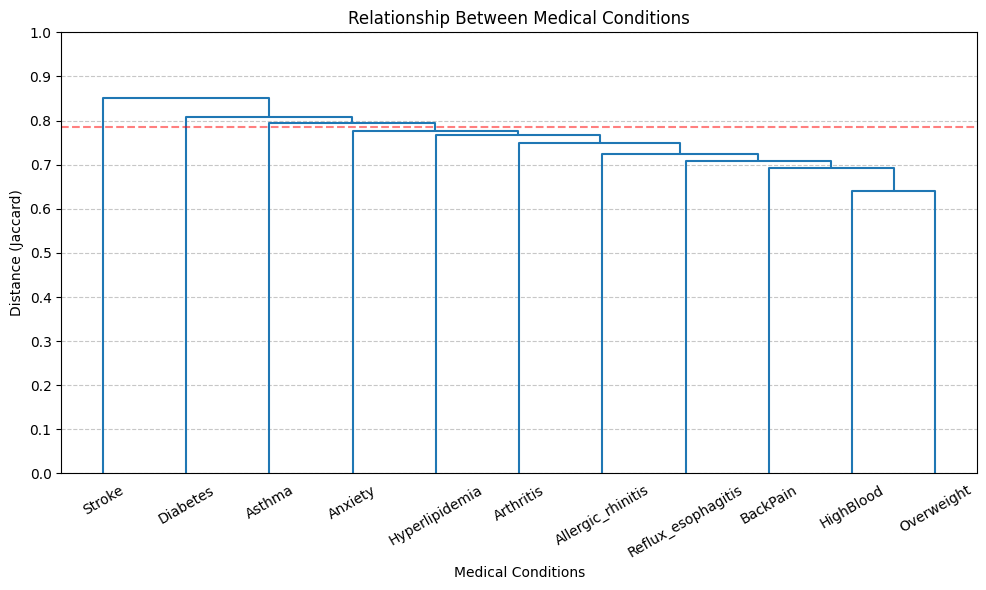

In [22]:
# Plot dendrogram
plt.figure(figsize=(10, 6))

dendrogram(
    linkage_matrix,
    labels=rdf.columns,
    leaf_rotation=30,
    leaf_font_size=10,
)

plt.yticks(np.arange(0, 1.1, 0.1))

plt.title('Relationship Between Medical Conditions')
plt.xlabel('Medical Conditions')
plt.ylabel('Distance (Jaccard)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0.785, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show

#### 4. Calculate Silhouette Scores to help inform the appropriate number of clusters.

In this analysis, Silhouette Scores are calculated for different numbers of clusters to help determine the appropriate number of clusters. 2 clusters are tested first and the code iterates until it reaches the number of columns in the dataframe minus 1. The number of columns here is 11, so the code will iterate on the Silhouette Score until it reaches 10 clusters. Stopping at 10 clusters is a meaningful limit because with 11 features, having 11 clusters would mean each data point would likely be assigned to its own cluster, which wouldn't provide useful insights about groupings in the data.

From the results of the Silhouette Scores, the score gets progressively less negative as the number of clusters increases. However, the Silhouette Score never becomes equal to or greater than 0. This suggests that the data might not have strong natural clustering tendencies. From the options provided, 9 clusters would be a reasonable choice for this analysis based on the Silhouette Score, but it may not be practical given that this would likely cause each variable to fall within its own cluster - similar to what is represented in the dendrogram. Attempting to balance the number of variables per cluster and the Silhouette Score, it is likely wisest to stick with a cluster amount closer to 5. 5 clusters is roughly when the score improvements slow down substantially - after this point, each additional cluster only improves the score by about 0.005 or less. This slowing improvement rate, combined with it being a reasonable middle ground for distributing variables across clusters, makes 5 a practical choice if solely considering the Silhouette Score to inform number of clusters.

Note: Explanation of Silhouette Score as a metric can be found in this analysis in section E1.

In [23]:
# Calculate silhouette scores 
print("\nAnalyzing silhouette scores for different numbers of clusters:")
silhouette_scores = []
n_clusters_range = range(2, len(rdf.columns))

# Use for loop to check Silhouette scores for different numbers of clusters
for n in n_clusters_range:
    cluster_labels = fcluster(linkage_matrix, n, criterion='maxclust')
    score = silhouette_score(rdf.transpose(), cluster_labels)
    silhouette_scores.append((n, score))
    print(f"Number of clusters: {n}, Silhouette score: {score:.3f}")


Analyzing silhouette scores for different numbers of clusters:
Number of clusters: 2, Silhouette score: -0.044
Number of clusters: 3, Silhouette score: -0.039
Number of clusters: 4, Silhouette score: -0.033
Number of clusters: 5, Silhouette score: -0.027
Number of clusters: 6, Silhouette score: -0.022
Number of clusters: 7, Silhouette score: -0.017
Number of clusters: 8, Silhouette score: -0.014
Number of clusters: 9, Silhouette score: -0.010
Number of clusters: 10, Silhouette score: -0.010


#### 5. Use the dendrogram and the Silhouette Score to make a final determination on the optimal number of clusters.

This analysis uses both a dendrogram and Silhouette Scores to help determine the optimal number of clusters. The dendrogram analysis yielded 4 as the most appropriate number of clusters. Although the gaps were close, there were apparent differences at several of the merge levels. The Silhouette Scores did little to help identify an appropriate cluster amount. The scores for clusters 2 through 10 were within 0.034 points of each other, with each additional cluster yielding an improvement of 0.006 or less toward 0. Given that, it seems more appropriate to give more consideration to the dendrogram in determining the optimal number of clusters. The final determination for clusters is 4. 

The conditions that fell within each of the 4 clusters are listed below.

In [24]:
# Set number of clusters
n_clusters = 4
cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Create cluster profiles
conditions_by_cluster = pd.DataFrame({
    'Condition': rdf.columns,
    'Cluster': cluster_labels
})

# Print results
print("\nConditions in each cluster:")
for cluster in range(1, n_clusters + 1):
    conditions = conditions_by_cluster[conditions_by_cluster['Cluster'] == cluster]['Condition']
    print(f"\nCluster {cluster}:")
    for condition in conditions:
        print(f"• {condition}")


Conditions in each cluster:

Cluster 1:
• Allergic_rhinitis
• Anxiety
• Arthritis
• BackPain
• HighBlood
• Hyperlipidemia
• Overweight
• Reflux_esophagitis

Cluster 2:
• Asthma

Cluster 3:
• Diabetes

Cluster 4:
• Stroke


### D2: Code Execution

The code used to complete hierarchical clustering is provided in Section D1 as part of the output and intermediate calculations.

## Part V: Data Summary and Implications

### E1: Quality of the Clustering Technique

A Silhouette Score will be used to determine the quality of the hierarchical clustering in this analysis. Silhouette Scores are a method to evaluate the quality of clustering algorithms by measuring each data point’s similarity to the cluster it belongs to and how different it is from other clusters (Gultekin, 2023). As Bhardwaj notes, it can also be used to check for the optimal number of clusters - as was done in previous sections of this analysis. Silhouette Scores produce a value on a scale from -1 to 1. The ideal score for a quality clustering algorithm would be 1. Scoring is as follows:
- A score close to -1 indicates the point might be assigned to the wrong cluster
- A score close to 0 indicates the point lies between clusters or is in a region of overlapping clusters
- A score close to 1 indicates the point is well-clustered with a clear separation from neighboring clusters

The Silhouette Score for the hierarchical clustering with 4 clusters is -0.033. While this negative score would typically indicate poor clustering performance, in this medical context the result is actually informative. The near-zero value suggests that patients' condition patterns frequently overlap between clusters, while the negative value indicates that many patients might be more similar to neighboring clusters than to their own assigned cluster. This makes sense from a clinical stand point because medical conditions often co-occur and have dependencies on one another. For example, conditions like high blood pressure, diabetes, and being overweight frequently co-occur as part of metabolic syndrome, per the Mayo Clinic. Ultimately, the negative silhouette score reflects the reality that medical conditions don't naturally separate into well-isolated groups. Overall, the clustering appears statistically weak, but at least the results align with our understanding of how medical conditions interact in real patients.

In [25]:
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
score = silhouette_score(rdf.transpose(), cluster_labels)

print(f"The Silhouette Score for 4 clusters is {score:.3f}.")

The Silhouette Score for 4 clusters is -0.033.


### E2: Results and Implications

The hierarchical clustering in this analysis resulted in 4 clusters being produced. Each of the 4 clusters contained a grouping of medical conditions that identify patterns of co-occuring medical conditions within the patient population. 3 of the 4 clusters were actually associated to only a single medical condition; those conditions were Asthma, Diabetes, and Stroke. The 4th cluster contained a grouping of Allergic Rhinitis, Anxiety, Arthritis, Back Pain, High Blood Pressure, Hyperlipidemia, Overweight, and Reflux Esophagitis. It is surprising in this analysis to see all medical conditions essentially existing on their own or lumped in to a group with everything else. While initially surprising, the result does provide valuable insights into how these medical conditions exist within the patient population. Asthma, Diabetes, and Stroke being isolated into individual clusters may suggest that they have more distinct occurrence patterns that set them apart from the other conditions in the data set.

The cluster containing eight conditions reveals important patterns of co-occurrence among chronic conditions across different bodily functions. This grouping alongside the analysis's negative silhouette score of -0.033 suggests that there is significant overlap between these conditions in the patient population. This finding aligns with clinical observations that many chronic conditions share common risk factors and tend to develop concurrently. The results highlight the importance of considering the conditions as interconnected rather than isolated issues, which may inform a more holistic approach to patient care strategy.

These findings have significant implications for healthcare delivery and patient outcomes. The clustering pattern suggests that healthcare providers should continue to be aware of potential comorbidities, especially with patients who present with conditions from the large cluster. The distinct clustering of Asthma, Diabetes, and Stroke indicates that these conditions might require more specialized management approaches. Overall, these findings could inform the development of more effective treatment protocols and risk assessment strategies.

In [26]:
# Set number of clusters
n_clusters = 4
cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Create cluster profiles
conditions_by_cluster = pd.DataFrame({
    'Condition': rdf.columns,
    'Cluster': cluster_labels
})

# Print results
print("\nConditions in each cluster:")
for cluster in range(1, n_clusters + 1):
    conditions = conditions_by_cluster[conditions_by_cluster['Cluster'] == cluster]['Condition']
    print(f"\nCluster {cluster}:")
    for condition in conditions:
        print(f"• {condition}")


Conditions in each cluster:

Cluster 1:
• Allergic_rhinitis
• Anxiety
• Arthritis
• BackPain
• HighBlood
• Hyperlipidemia
• Overweight
• Reflux_esophagitis

Cluster 2:
• Asthma

Cluster 3:
• Diabetes

Cluster 4:
• Stroke


### E3: Limitation

The limitation for this particular analysis seems to be the relatively small number of medical conditions included in the data set. Only 11 medical conditions provides a restricted view of potential disease interactions and comorbidity patterns. Common chronic conditions like cancer, heart disease, chronic kidney disease, depression, and many others were not included in the data set. Not having data on these conditions could significantly impact the clustering results and potentially mask important patterns. For example, the conditions that were clustered individually may show stronger clustering and patterns alongside a broader spectrum of diseases. It could also be said that the binary nature of the condition values limits the insights that can be drawn. If measurements were used in place of a simple yes or no, disease severity, duration, and/or progression could be used to cluster to identify patterns. This analysis would surely benefit from more chronic medical conditions and more detailed clinical information about each condition.

### E4: Course of Action

Given the findings and limitations of this analysis, several key actions are recommended. Prior to taking any action, it would be extremely helpful to have actual medical providers within the hospital system review the results. They may have frontline knowledge that helps broaden the understanding of the results and lead to more well-informed next steps. Combining such a step with the results produced already would allow health care providers develop more integrated treatment plans, particularly targeting the medical conditions within the larger cluster. This could begin with implementing more proactive screening measures to help identify patients with these conditions upon initial hospital admission. This would include screening measures that not only check if the patient is aware of the condition, but also to actually do a comprehensive screening for medical conditions to do an initial diagnosis. Earlier detection via screening could lead to more effective management of related conditions. 

Aside from actually implementing practices within the hospital system, this analysis could benefit from a more comprehensive data set that includes a broader range of medical conditions. A key limitation of this analysis is the lack of medical conditions which may ultimately be preventing the identification of patterns and quality clustering. It would be interesting to see if adding more medical conditions would help increase the Silhouette Score or if co-occurence of medical conditions actually causes the score to worsen. Perhaps the medical conditions in the analysis needs to be informed by an existing study of the top 25 most prevalent medical conditions, for example. Much more thought and research would need to happen to perform feature selection.

Even further analysis would benefit from incorporating more detailed clinical data, including disease severity, duration, and progression metrics, rather than just binary presence/absence indicators. This would provide deeper insights into how conditions interact and evolve together over time. Much thought and clinical expertise would need to go in to this to ensure that the measurements being used are consistent between medical conditions. Although standard scaling would help with scales, it seems intuitive that the measurements have to be based on a similar approach to ensure there is no ambiguity in the understanding of the analysis results.

## Part VI: Demonstration

### F: Panopto Video of Code

Included in the task submission.

### F1: Panopto Video of Programs

Included in the task submission.

### G: Sources for Third-Party Code

Bhardwaj, A. (2020, May 27). Silhouette coefficient : Validating clustering techniques. Medium. https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c 

datacamp. (n.d.). Data Mining II. https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii 

Keita, Z. (2023, January 19). An introduction to hierarchical clustering in Python. DataCamp. https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python

### H: Sources

Bhardwaj, A. (2020, May 27). Silhouette coefficient : Validating clustering techniques. Medium. https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c 

Cornell, J. E., Pugh, J. A., John W. Williams, J., Kazis, L., Lee, A. F. S., Parchman, M. L., Zeber, J., Pederson, T., Montgomery, K. A., & Noël, P. H. (2009, January 13). Multimorbidity clusters: Clustering binary data from multimorbidity clusters: Clustering binary data from a large administrative medical database. Applied Multivariate Research. https://amr.uwindsor.ca/index.php/AMR/article/view/658 

datacamp. (n.d.). Data Mining II. https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii 

GeeksforGeeks. (2023b, December 12). Hierarchical clustering in data mining. https://www.geeksforgeeks.org/hierarchical-clustering-in-data-mining/ 

Gultekin, H. (2023, September 7). What is silhouette score?. Medium. https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a 

Hierarchical cluster analysis in SPSS - explained, performing test. Statistical Analysis Services For Academic Researches. (n.d.). https://spssanalysis.com/hierarchical-cluster-analysis-in-spss/#:~:text=Here%20are%20the%20key%20assumptions,using%20the%20chosen%20distance%20metric. 

How to calculate Jaccard similarity in Python. GeeksforGeeks. (2023, August 11). https://www.geeksforgeeks.org/how-to-calculate-jaccard-similarity-in-python/ 

IBM. (n.d.). Hierarchical cluster analysis. SPSS Statistics. https://www.ibm.com/docs/en/spss-statistics/beta?topic=features-hierarchical-cluster-analysis 

Keita, Z. (2023, January 19). An introduction to hierarchical clustering in Python. DataCamp. https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python

Mayo Foundation for Medical Education and Research. (n.d.). Metabolic syndrome. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/metabolic-syndrome/symptoms-causes/syc-20351916 

Newcomer, S. R., Steiner, J. F., & Bayliss, E. A. (2011, August 9). Identifying subgroups of complex patients with cluster analysis. AJMC. https://www.ajmc.com/view/ajmc_11julaug_newcomer_e324to32

Van Otten, N. (2023, October 4). Hierarchical Clustering Comprehensive & practical how to guide in Python. Spot Intelligence. https://spotintelligence.com/2023/09/12/hierarchical-clustering-comprehensive-practical-how-to-guide-in-python/ 